# Práctica 1: Resolución de problemas de clasifcación y análisis experimental.

## Imports:

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


## Preprocesado de datos

In [3]:
# Lectura de datos con pandas
data = pd.read_csv("mamografias.csv", na_values="?")

# Mostramos los primeros datos y vemos sus características
data.head()

,BI-RADS,Age,Shape,Margin,Density,Severity
0,5.0,67.0,L,5.0,3.0,maligno
1,4.0,43.0,R,1.0,NaN,maligno
2,5.0,58.0,I,5.0,3.0,maligno
3,4.0,28.0,R,1.0,3.0,benigno
4,5.0,74.0,R,5.0,NaN,maligno


In [4]:
data.describe()

,BI-RADS,Age,Margin,Density
count,959.000000,956.000000,913.000000,885.000000
mean,4.296142,55.487448,2.796276,2.910734
std,0.706291,14.480131,1.566546,0.380444
min,0.000000,18.000000,1.000000,1.000000
25%,4.000000,45.000000,1.000000,3.000000
50%,4.000000,57.000000,3.000000,3.000000
75%,5.000000,66.000000,4.000000,3.000000
max,6.000000,96.000000,5.000000,4.000000


In [5]:
# Vemos la cantidad de datos nulos que hay
data.isnull().sum()

BI-RADS      2
Age          5
Shape        0
Margin      48
Density     76
Severity     0
dtype: int64

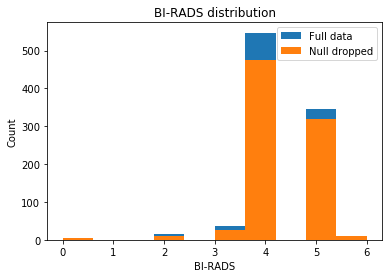

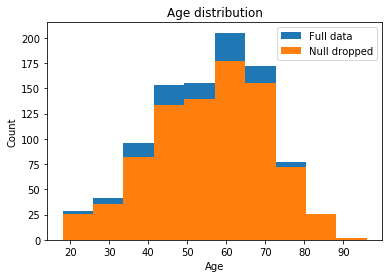

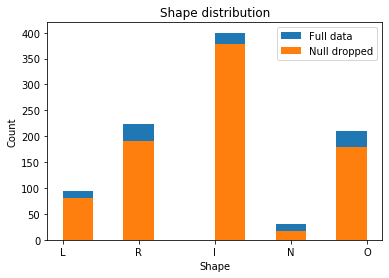

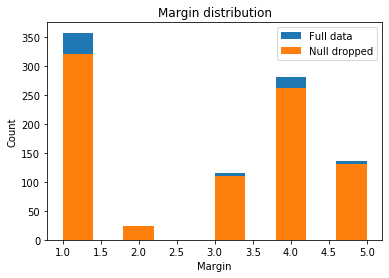

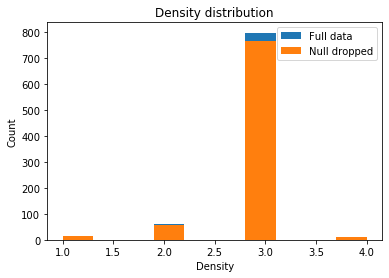

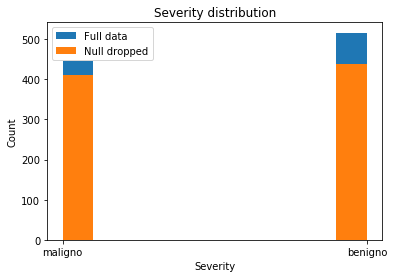

In [6]:
# Guardamos una nueva variable con los datos nulos quitados
data_nonull = data.dropna()

# Comprobamos que no hay ningun tipo de correlacion
for col in data.columns:
    plt.hist(data[col], label="Full data")
    plt.hist(data_nonull[col], label = "Null dropped")
    plt.title(col + " distribution")
    plt.legend()
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.show()

In [7]:
from sklearn.preprocessing import LabelEncoder

# Codificamos las columnas representadas con cadenas para que se muestren como enteros
le = LabelEncoder()
data_nonull["Shape"] = le.fit_transform(data_nonull["Shape"])
data_nonull["Severity"] = le.fit_transform(data_nonull["Severity"])

# Scale features data using StandardScaler 
# No need to scale the labels in all_classes as they are just 0 and 1's
# scaler = StandardScaler()
# data_nonull = scaler.fit_transform(data_nonull)
# data_nonull

data_nonull = np.array(data_nonull, np.int64)

## División de los datos

In [8]:
# Importamos la herramienta y hacemos la división en entrenamiento y test
from sklearn.model_selection import train_test_split

# Division de los datos entre atributos y clases
features = data_nonull[:,:-1]
tarjets = data_nonull[:,-1]

# Division entre datos de entrenamiento y datos de test
x_train, x_test, y_train, y_test = train_test_split(features, tarjets, test_size = 0.20, random_state = 0)

print(x_train.shape)
print(x_test.shape)


(677, 5)
(170, 5)


In [9]:
# Escalado de los atributos para que sus valores esten entre 0 y 1
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

x_train


array([[-0.42625141,  1.09108253, -0.9988116 ,  0.740385  ,  0.24780783],
       [-0.42625141, -0.45931408,  1.35727011, -1.15347134,  0.24780783],
       [-0.42625141,  0.01254576,  1.35727011, -1.15347134,  0.24780783],
       ...,
       [-0.42625141, -0.18967989, -0.9988116 ,  0.740385  ,  0.24780783],
       [ 1.00232386,  0.2147714 , -0.9988116 ,  0.10909955,  0.24780783],
       [ 1.00232386, -0.05486279, -0.9988116 ,  0.740385  ,  0.24780783]])

## Configuración de los algoritmos

### K-Nearest-Neighbors (k-NN)

              precision    recall  f1-score   support

           0       0.80      0.82      0.81       347
           1       0.80      0.78      0.79       330

    accuracy                           0.80       677
   macro avg       0.80      0.80      0.80       677
weighted avg       0.80      0.80      0.80       677

SCORE:  0.7991137370753324
AUC score:  0.7986900707361801


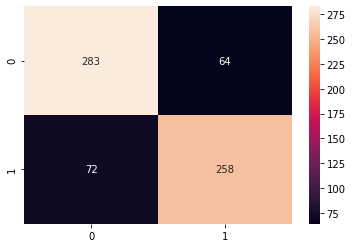

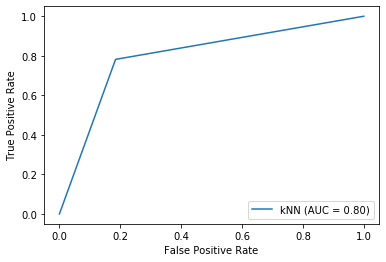

In [10]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, RocCurveDisplay, roc_auc_score
from sklearn.neighbors import KNeighborsClassifier

# Creacion del clasificador kNN
KnnClf = KNeighborsClassifier(n_neighbors=5)

# Calculo de las predicciones mediante validacion cruzada (5-folds)
y_pred = cross_val_predict(KnnClf, x_train, y_train, cv=5)

print(classification_report(y_train, y_pred))
print("SCORE: ", accuracy_score(y_train, y_pred))

# Matriz de confusion de los resultados
confusion_matrix = confusion_matrix(y_train, y_pred)

sns.heatmap(confusion_matrix, annot = True, fmt='g')

# Curva ROC
fpr, tpr, threshold = roc_curve(y_train, y_pred)
roc_auc = roc_auc_score(y_train, y_pred)

roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name="kNN").plot()
print("AUC score: ", roc_auc)

### Decision Tree

              precision    recall  f1-score   support

           0       0.75      0.82      0.78       347
           1       0.79      0.72      0.75       330

    accuracy                           0.77       677
   macro avg       0.77      0.77      0.77       677
weighted avg       0.77      0.77      0.77       677

SCORE:  0.7666174298375185
AUC score:  0.7653567374028469


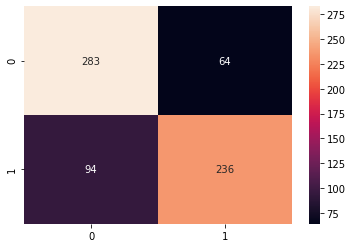

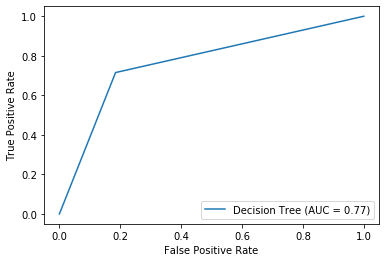

In [11]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, RocCurveDisplay, roc_auc_score
from sklearn import tree

# Creacion del clasificador Decision Tree
DecTreeClf = tree.DecisionTreeClassifier(random_state=0)

# Calculo de las predicciones mediante validacion cruzada (5-folds)
y_pred = cross_val_predict(DecTreeClf, x_train, y_train, cv=5)

print(classification_report(y_train, y_pred))
print("SCORE: ", accuracy_score(y_train, y_pred))

# Matriz de confusion de los resultados
confusion_matrix = confusion_matrix(y_train, y_pred)

sns.heatmap(confusion_matrix, annot = True, fmt='g')

# Curva ROC
fpr, tpr, threshold = roc_curve(y_train, y_pred)
roc_auc = roc_auc_score(y_train, y_pred)

roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name="Decision Tree").plot()
print("AUC score: ", roc_auc)

### Naive-Bayes

              precision    recall  f1-score   support

           0       0.85      0.78      0.81       347
           1       0.79      0.85      0.82       330

    accuracy                           0.82       677
   macro avg       0.82      0.82      0.82       677
weighted avg       0.82      0.82      0.82       677

SCORE:  0.8153618906942393
AUC score:  0.8162474893022443


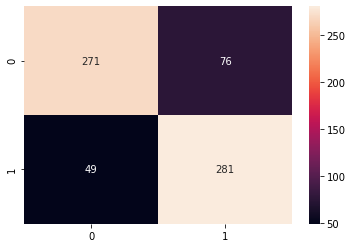

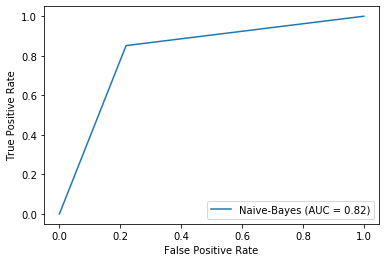

In [12]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, RocCurveDisplay, roc_auc_score
from sklearn.naive_bayes import GaussianNB

# Creacion del clasificador Naive-Bayes
GaussianClf = GaussianNB()

# Calculo de las predicciones mediante validacion cruzada (5-folds)
y_pred = cross_val_predict(GaussianClf, x_train, y_train, cv=5)

print(classification_report(y_train, y_pred))
print("SCORE: ", accuracy_score(y_train, y_pred))

# Matriz de confusion de los resultados
confusion_matrix = confusion_matrix(y_train, y_pred)

sns.heatmap(confusion_matrix, annot = True, fmt='g')

# Curva ROC
fpr, tpr, threshold = roc_curve(y_train, y_pred)
roc_auc = roc_auc_score(y_train, y_pred)

roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name="Naive-Bayes").plot()
print("AUC score: ", roc_auc)

### Neural Network

              precision    recall  f1-score   support

           0       0.82      0.87      0.85       347
           1       0.86      0.80      0.83       330

    accuracy                           0.84       677
   macro avg       0.84      0.84      0.84       677
weighted avg       0.84      0.84      0.84       677

SCORE:  0.8360413589364845
AUC score:  0.8350842721159724


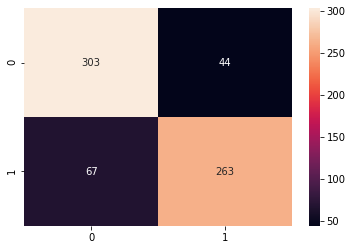

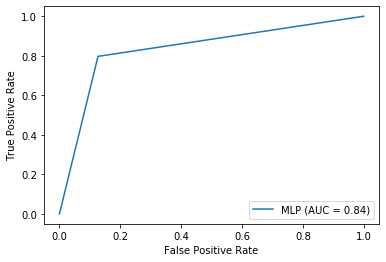

In [13]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, RocCurveDisplay, roc_auc_score
from sklearn.neural_network import MLPClassifier

# Creacion del clasificador MultiLayer Perceptron
PerceptronClf = MLPClassifier(hidden_layer_sizes=100, random_state=0)

# Calculo de las predicciones mediante validacion cruzada (5-folds)
y_pred = cross_val_predict(PerceptronClf, x_train, y_train, cv=5)

print(classification_report(y_train, y_pred))
print("SCORE: ", accuracy_score(y_train, y_pred))

# Matriz de confusion de los resultados
confusion_matrix = confusion_matrix(y_train, y_pred)

sns.heatmap(confusion_matrix, annot = True, fmt='g')

# Curva ROC
fpr, tpr, threshold = roc_curve(y_train, y_pred)
roc_auc = roc_auc_score(y_train, y_pred)

roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name="MLP").plot()
print("AUC score: ", roc_auc)

### Support Vector Machine (SVM)

              precision    recall  f1-score   support

           0       0.81      0.88      0.84       347
           1       0.86      0.78      0.82       330

    accuracy                           0.83       677
   macro avg       0.83      0.83      0.83       677
weighted avg       0.83      0.83      0.83       677

SCORE:  0.8301329394387001
AUC score:  0.8289494367304165


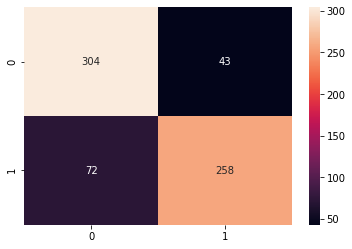

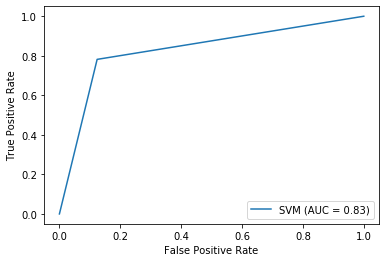

In [14]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, RocCurveDisplay, roc_auc_score
from sklearn.svm import SVC

# Creacion del clasificador SVM
SvmClf = SVC(random_state=0, gamma='auto')

# Calculo de las predicciones mediante validacion cruzada (5-folds)
y_pred = cross_val_predict(SvmClf, x_train, y_train, cv=5)

print(classification_report(y_train, y_pred))
print("SCORE: ", accuracy_score(y_train, y_pred))

# Matriz de confusion de los resultados
confusion_matrix = confusion_matrix(y_train, y_pred)

sns.heatmap(confusion_matrix, annot = True, fmt='g')

# Curva ROC
fpr, tpr, threshold = roc_curve(y_train, y_pred)
roc_auc = roc_auc_score(y_train, y_pred)

roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name="SVM").plot()
print("AUC score: ", roc_auc)

In [15]:

# Analisis de los componentes principales
from sklearn.decomposition import PCA

pca = PCA(n_components = None)

x_train = pca.fit_transform(x_train)
x_test = pca.transform(x_test)

x_train


array([[-1.28064731, -0.01823418,  1.11638263,  0.19792693, -0.23125601],
       [ 1.75527373, -0.40027763, -0.07396401, -0.6074537 ,  0.10520441],
       [ 1.55137516, -0.33586812,  0.20264834, -0.92225085,  0.06891592],
       ...,
       [-0.72720832, -0.19305999,  0.36557769,  1.05237635, -0.13275868],
       [-1.15532207, -0.16590121, -0.5993399 , -0.06161434, -0.62961812],
       [-1.39562884, -0.19557005, -0.69424444,  0.35327743, -0.14852117]])